In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
import warnings
import os as os
## import necessary Libraries
##test

In [30]:
# Load data from file into array
data_in = np.genfromtxt(r'S011/S011L1.txt', skip_header=6, delimiter='	')



In [27]:
pixel = np.zeros(len(data_in))
wavelength = np.zeros(len(data_in))
darkref = np.zeros(len(data_in))
transref = np.zeros(len(data_in))
T1 = np.zeros(len(data_in))
T2 = np.zeros(len(data_in))
T3 = np.zeros(len(data_in))
T4 = np.zeros(len(data_in))
for i in range(len(data_in)):

    pixel[i] = data_in[i][0]
    wavelength[i] = data_in[i][1]
    darkref[i] = data_in[i][2]
    transref[i] = data_in[i][3]
## different trials (program takes image of spectra every 30 seconds)
    T1[i] = data_in[i][4]


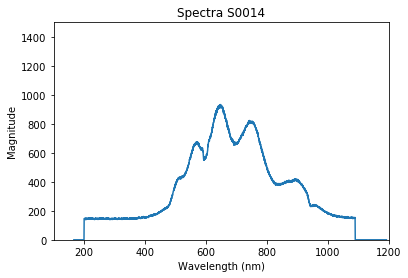

In [28]:
# Plot model with a solid line
plt.plot(wavelength,T1, '-');

# Set axis limits to include origin
plt.xlim(100,1200)
plt.ylim(0,1500);

# Add axis labels
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnitude');

# Add legend
## plt.legend(['Data','100 $\Omega$'])

# Add title
plt.title('Spectra S0014');

In [32]:
#load in all necessary data, since background and noise data is needed
s130 = np.genfromtxt('S011/S011L1.txt', skip_header = 6, delimiter = '	')
blankARraw = np.genfromtxt('BLANK_AR.txt', skip_header = 6, delimiter = '	')
blankBRraw = np.genfromtxt('BLANK_BR.txt', skip_header = 6, delimiter = '	')
std_corrARraw = np.genfromtxt('S011/std_ar.txt', skip_header = 6, delimiter = '	')
std_corrBRraw = np.genfromtxt('S011/std1.txt', skip_header = 6, delimiter = '	')
print(std_corrARraw)

[[0.000000e+00 1.662440e+02 0.000000e+00 0.000000e+00 0.000000e+00]
 [1.000000e+00 1.665140e+02 0.000000e+00 0.000000e+00 0.000000e+00]
 [2.000000e+00 1.667840e+02 0.000000e+00 0.000000e+00 0.000000e+00]
 ...
 [3.645000e+03 1.192546e+03 0.000000e+00 0.000000e+00 0.000000e+00]
 [3.646000e+03 1.192833e+03 0.000000e+00 0.000000e+00 0.000000e+00]
 [3.647000e+03 1.193121e+03 0.000000e+00 0.000000e+00 0.000000e+00]]


In [34]:
image1 = np.zeros(len(s130))
image2 = np.zeros(len(s130))
wavel = np.zeros(len(s130))
blankAR = np.zeros(len(s130))
blankBR = np.zeros(len(s130))
std_corrAR = np.zeros(len(s130))
std_corrBR = np.zeros(len(s130))

## data before correction
for i in range(len(s130)):
    image1[i] = s130[i][4]
    wavel[i] = s130[i][1]
    blankAR[i] = blankARraw[i][4] ## average before and after?
    blankBR[i] = blankBRraw[i][4] 
    std_corrAR[i] = std_corrARraw[i][4]
    std_corrBR[i] = std_corrBRraw[i][4]
## subtract background
nobackground = image1 - blankAR
final = np.divide(nobackground,std_corrAR, out = np.zeros_like(nobackground), where = std_corrAR != 0)
print(final)

[0. 0. 0. ... 0. 0. 0.]


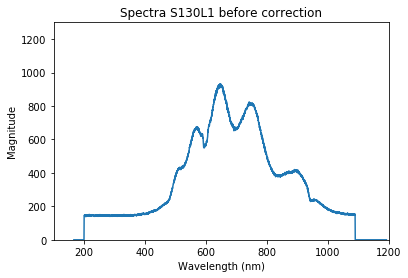

In [35]:
# Plot raw data with a solid line
plt.plot(wavel,image1, '-');

# Set axis limits to include origin
plt.xlim(100,1200)
plt.ylim(0,1300);

# Add axis labels
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnitude');

# Add legend
## plt.legend(['Data','100 $\Omega$'])

# Add title
plt.title('Spectra S130L1 before correction');

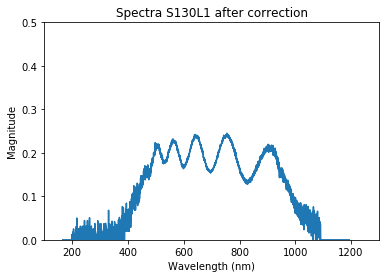

In [36]:
# Plot cleaned data with a solid line
plt.plot(wavel,final, '-');

# Set axis limits to include origin
plt.xlim(100,1300)
plt.ylim(0,.5);

# Add axis labels
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnitude');

# Add legend
## plt.legend(['Data','100 $\Omega$'])

# Add title
plt.title('Spectra S130L1 after correction');

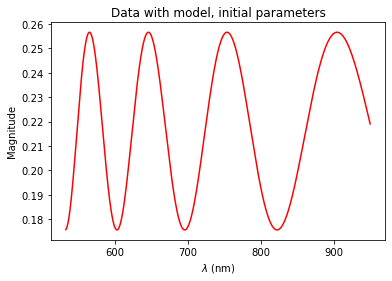

In [76]:
## Begin fitting by declaring model fitting function

def model(a,b,d,x):
    n = 2.39
    reflectance = a+b*np.cos(d*n/x)
    
    return reflectance
## a and b are constants, d is thickness, x is wavelength, n is refractive index of material (2.39?)

## set initial param. values below based on existing data 2018-2019

ainit = .21609
binit =.04046
dinit = 11887.87457
## index depends on material (2.39 used in existing data 2018-2019)
pinit = [ainit,binit,dinit]
## plot model with inital parameters
## cut off start and end of data
xmodel = wavel [1330:2800]
yfit1 = final[1330:2800] 
plt.plot(xmodel,model(ainit,binit,dinit,xmodel),'r-')

# Label axes and give it a title for notebook (remove it when including the plot in a report)
plt.xlabel('$\\lambda$ (nm)')
plt.ylabel('Magnitude')
plt.title('Data with model, initial parameters')
plt.show()


[-7.40306043e+02  4.04600000e-02  1.18878746e+04]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


/opt/conda/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


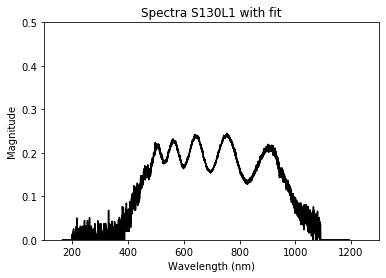

In [79]:
## need to subtract background, and divide out ?noise? (see origin file)



pOpt, pVar = curve_fit(model,xmodel,yfit1, p0 = pinit)

print (pOpt)
print(pVar)
## plot fit on top of data
plt.plot(wavel,final, 'k-');
plt.plot(xmodel, model(pOpt[0],pOpt[1],pOpt[2],xmodel), '.');

# Set axis limits to include origin
plt.xlim(100,1300)
plt.ylim(0,.5000);

# Add axis labels
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnitude');

# Add legend
## plt.legend(['Data','100 $\Omega$'])

# Add title
plt.title('Spectra S130L1 with fit');
